Scroll to bottom to see eda conclusion and model implementation

In [469]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
plt.style.use('dark_background')
pd.set_option('display.max_columns', 200)

In [470]:
df = pd.read_csv(r"./Diwali Sales Data.csv",encoding='latin')
df.drop_duplicates(inplace=True)
df.drop(columns=['Status','unnamed1','User_ID','Product_ID'],inplace=True)
df.head()

,Cust_name,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,Sanskriti,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,Kartik,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,Bindu,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,Sudevi,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,Joni,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [471]:
df.describe()

,Age,Marital_Status,Orders,Amount
count,11243.000000,11243.000000,11243.000000,11231.000000
mean,35.422841,0.420261,2.488749,9454.084982
std,12.756369,0.493623,1.114960,5221.728776
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,1.000000,5443.000000
50%,33.000000,0.000000,2.000000,8109.000000
75%,43.000000,1.000000,3.000000,12677.500000
max,92.000000,1.000000,4.000000,23952.000000


In [472]:
#print(df['Cust_name'].value_counts())
print(df['Product_Category'].value_counts())
print(df['Orders'].value_counts())
print(df['Occupation'].value_counts())

Product_Category
Clothing & Apparel       2653
Food                     2493
Electronics & Gadgets    2082
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       99
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64
Orders
2    2895
1    2812
4    2771
3    2765
Name: count, dtype: int64
Occupation
IT Sector          1586
Healthcare         1408
Aviation           1309
Banking            1139
Govt                854
Hospitality         702
Media               637
Automobile          566
Chemical            542
Lawyer              531
Retail              501
Food Processing     423
Construction        413
Textile             3

12 amount null

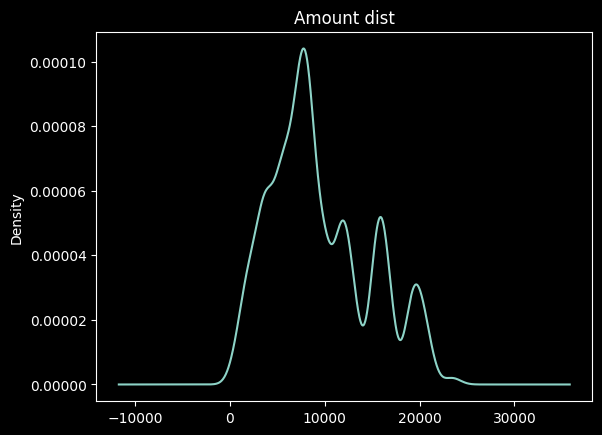

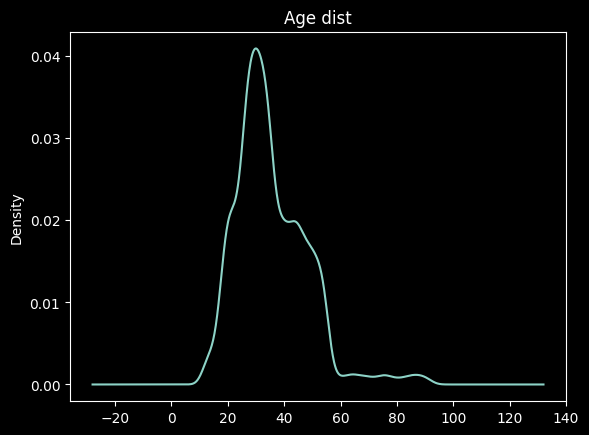

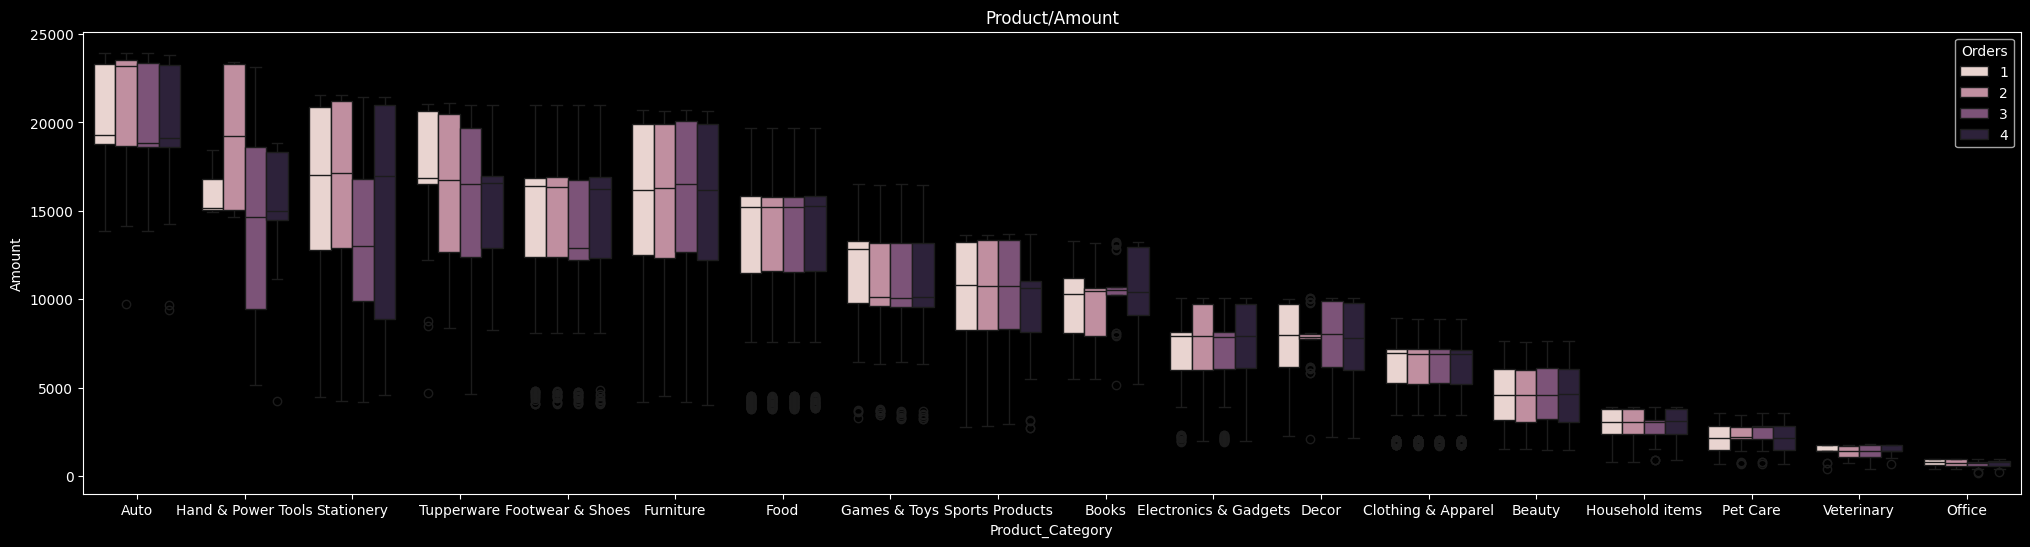

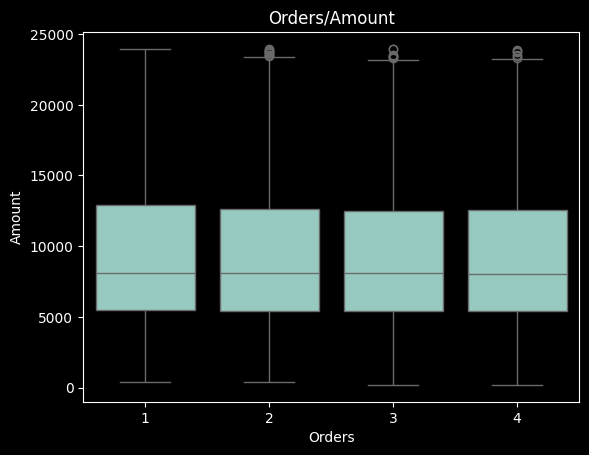

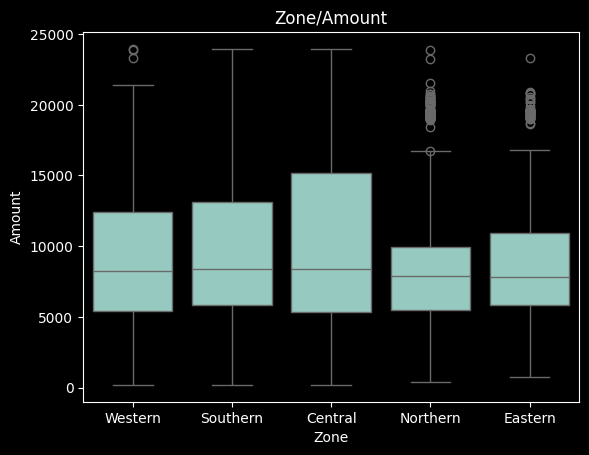

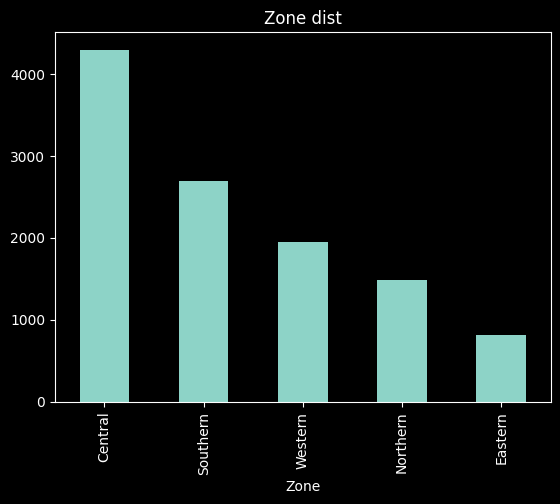

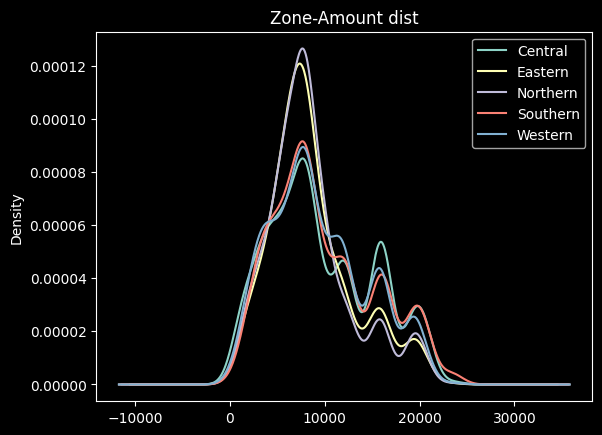

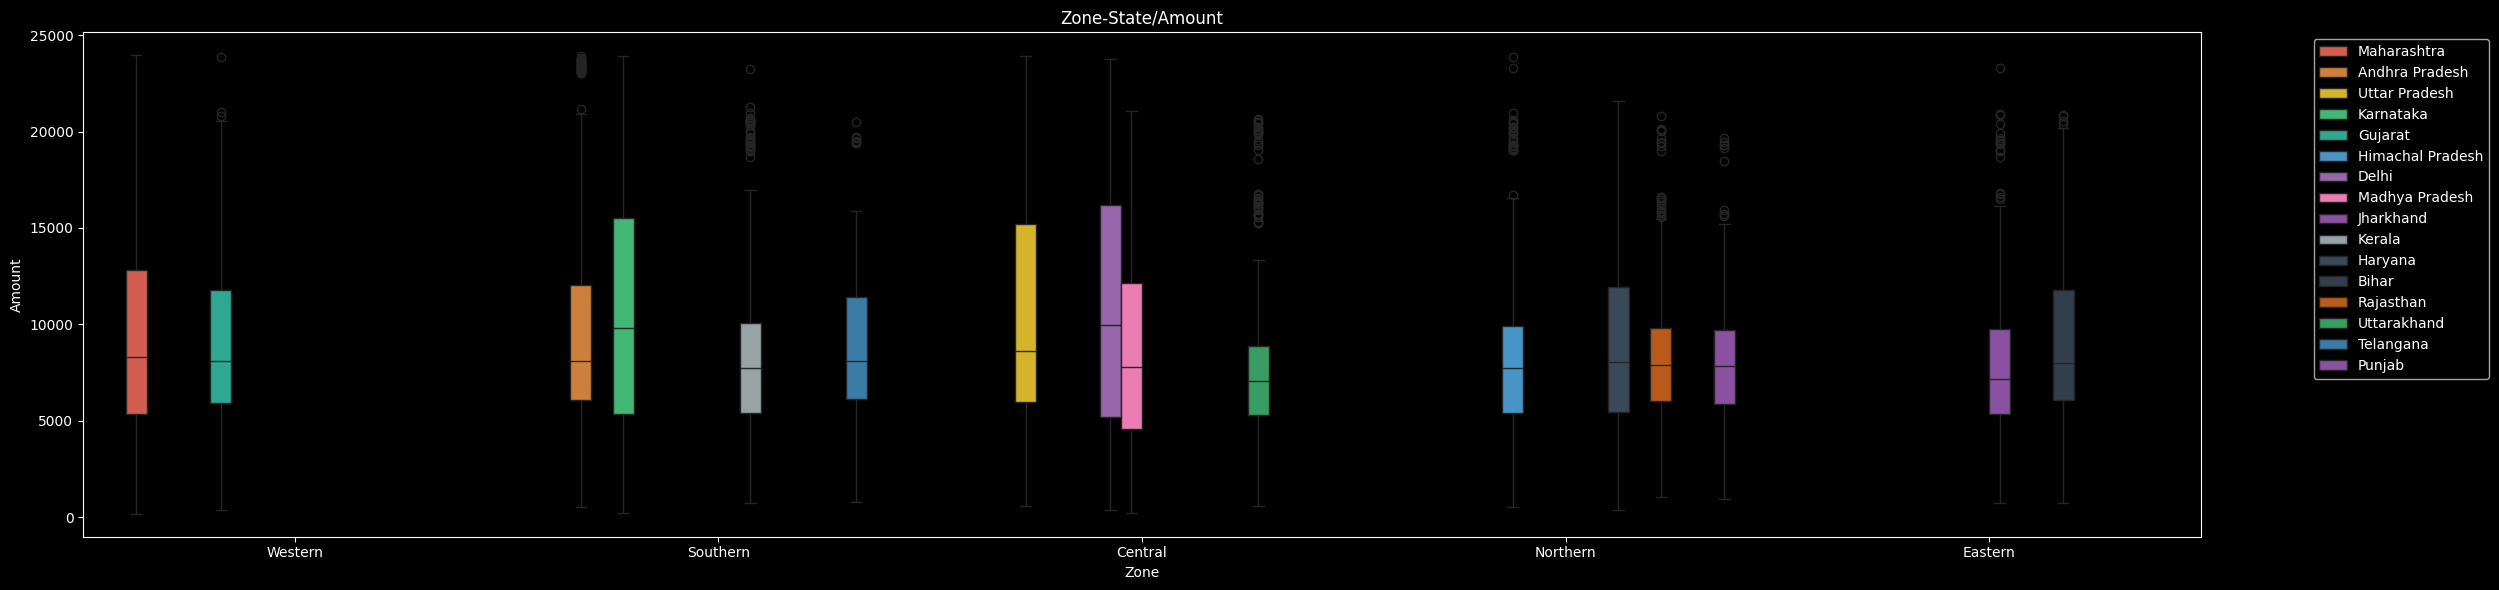

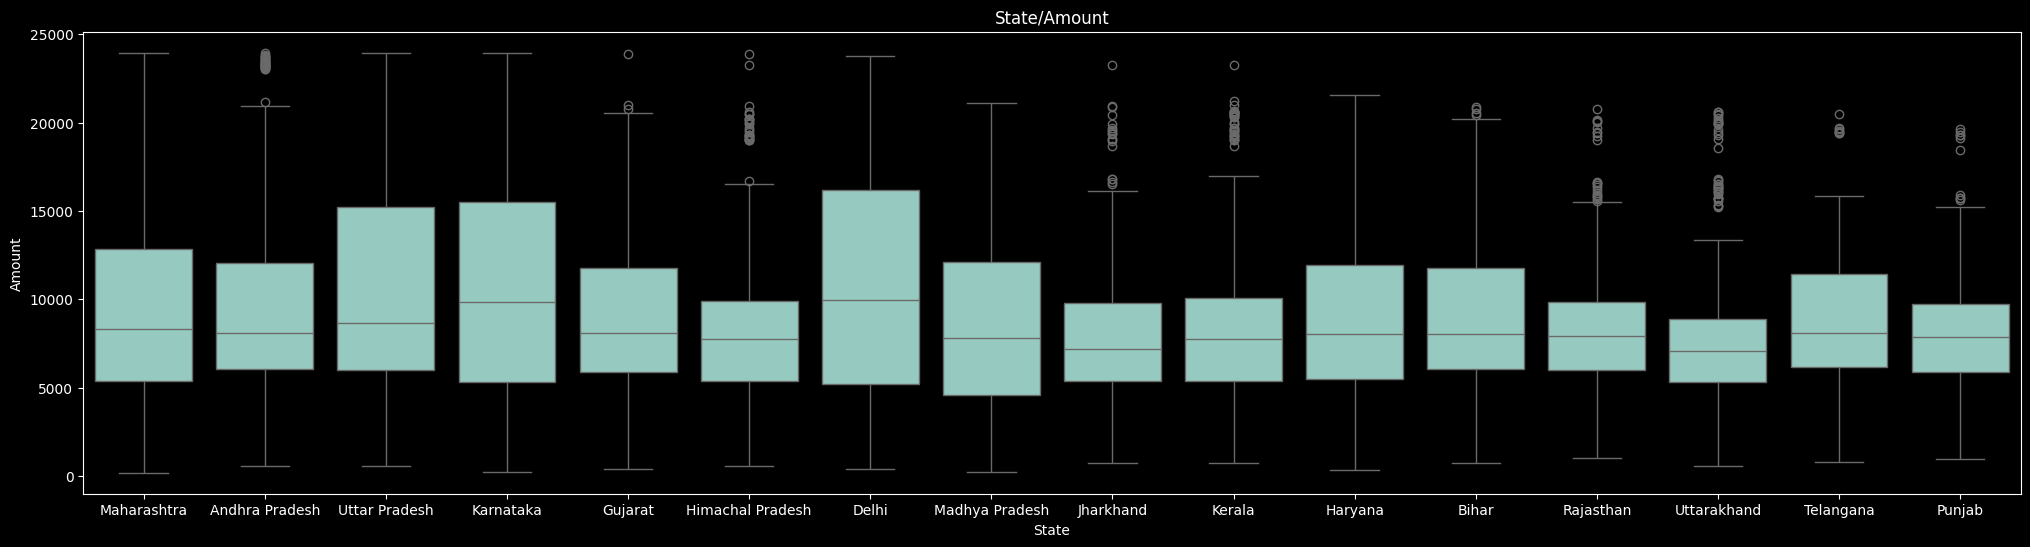

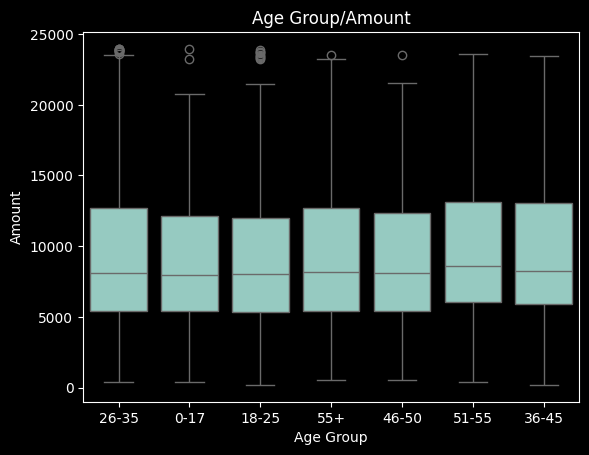

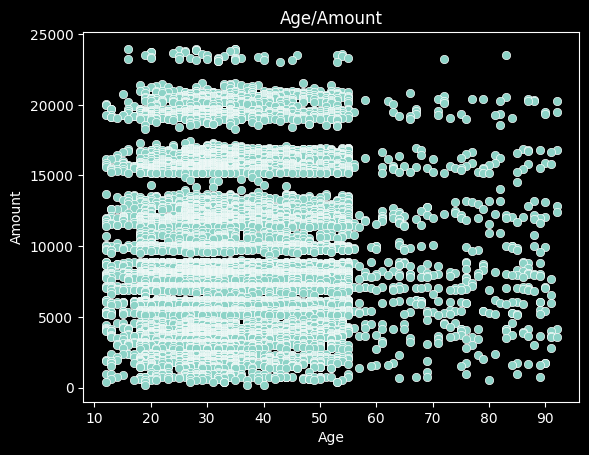

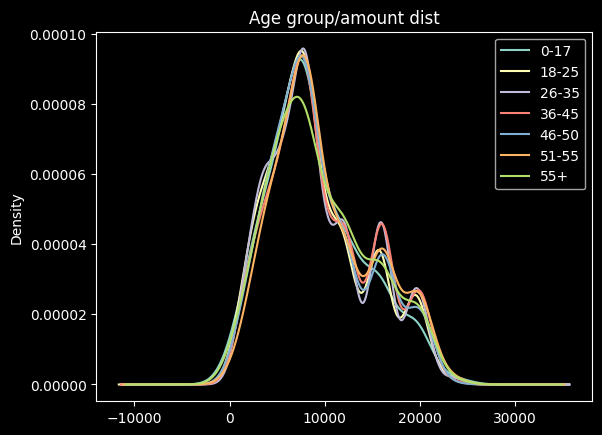

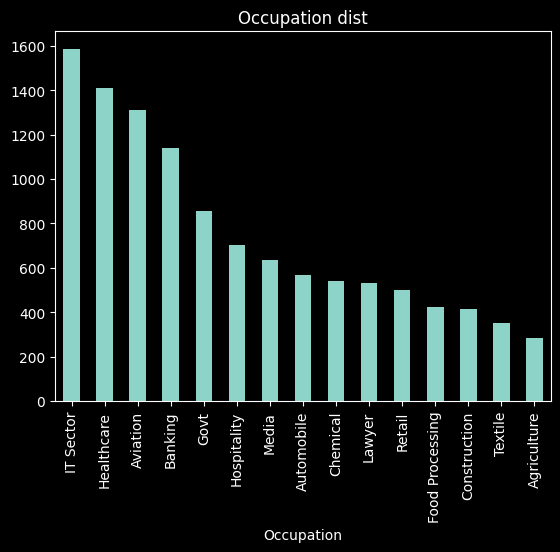

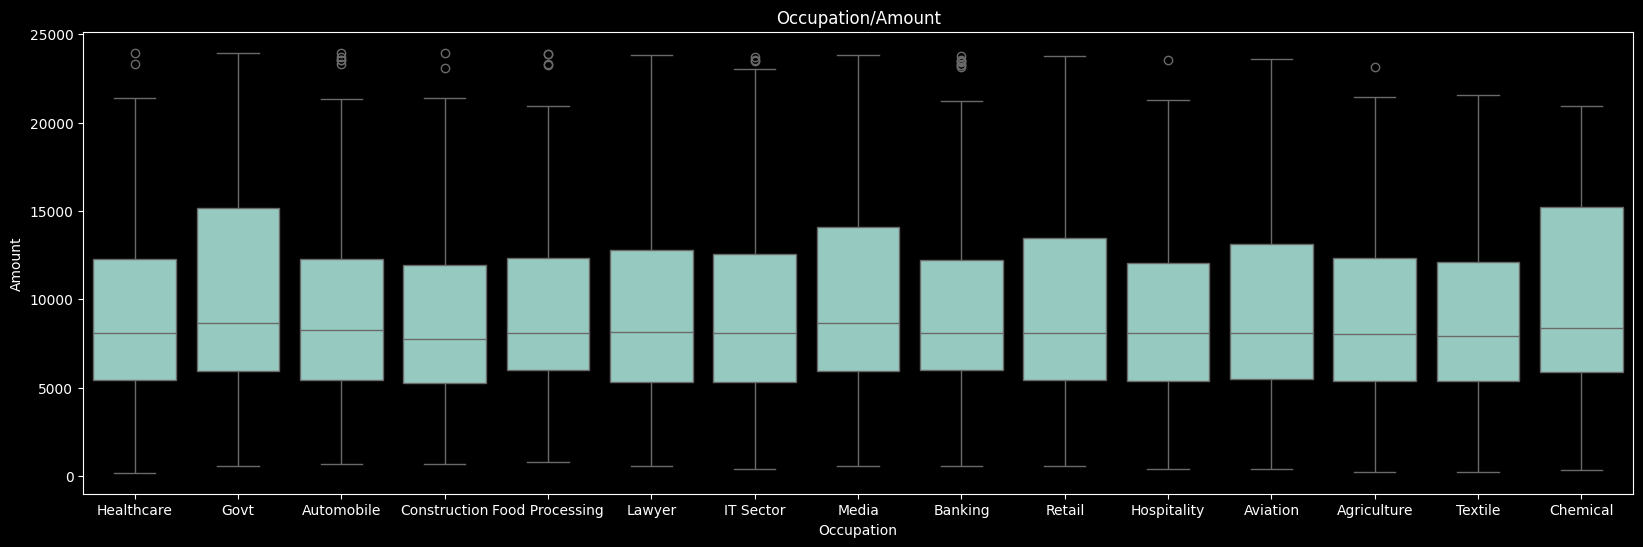

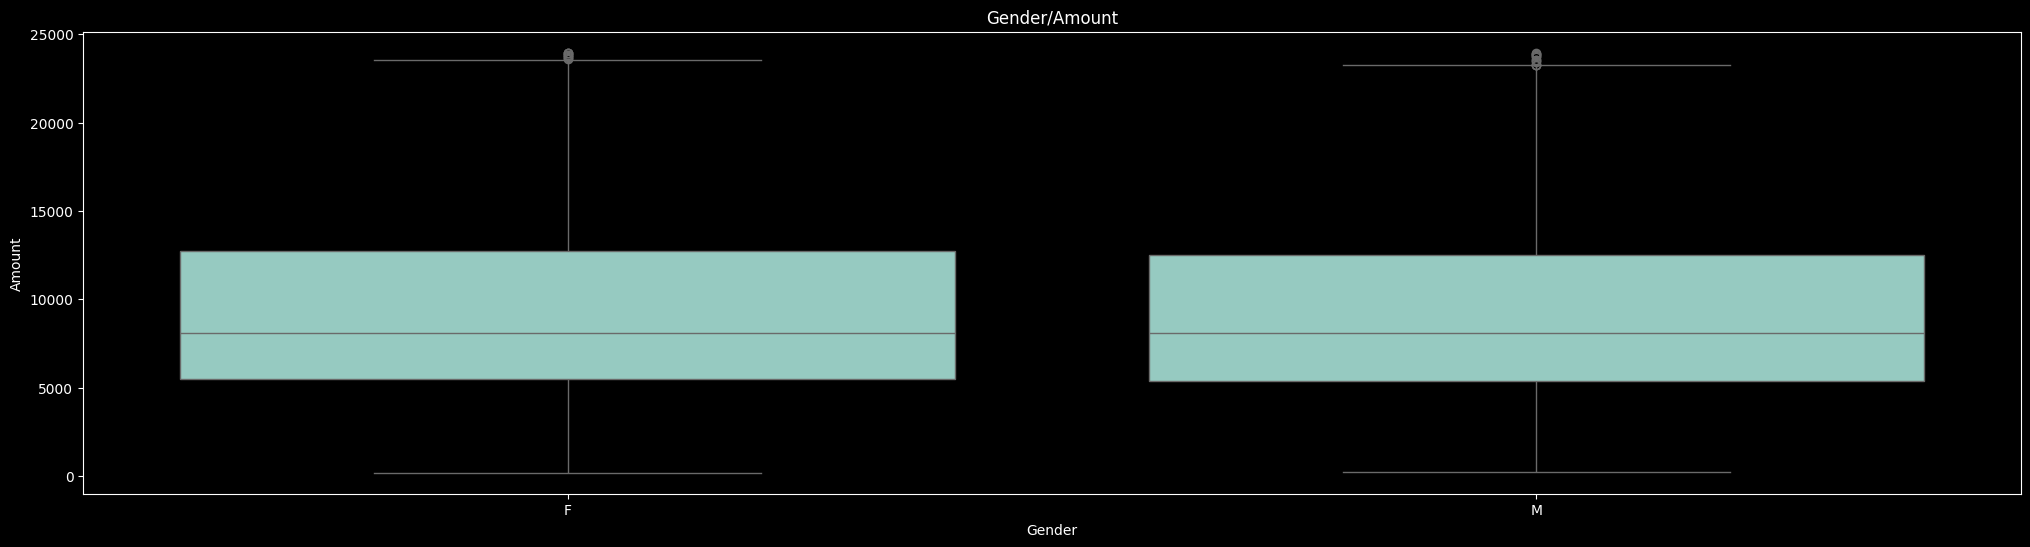

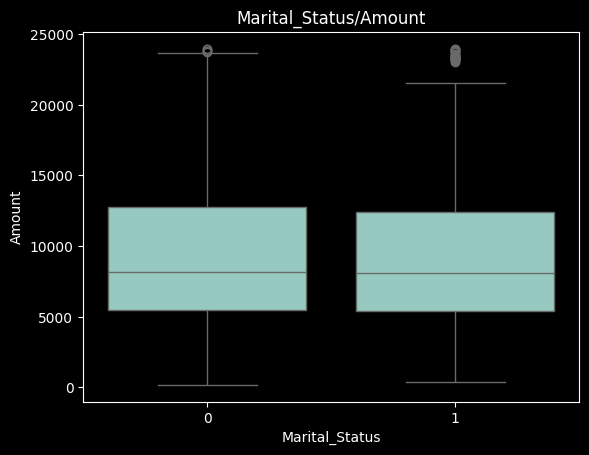

In [473]:
df['Amount'].plot(kind='kde')
plt.title('Amount dist')
plt.show()
df['Age'].plot(kind='kde')
plt.title('Age dist')
plt.show()
plt.figure(figsize=(25,6))
sns.boxplot(x='Product_Category', y='Amount',data=df,hue='Orders')
plt.title('Product/Amount')
plt.show()
sns.boxplot(x='Orders', y='Amount',data=df)
plt.title('Orders/Amount')
plt.show()
sns.boxplot(x='Zone', y='Amount',data=df)
plt.title('Zone/Amount')
plt.show()
df['Zone'].value_counts().plot(kind='bar')
plt.title('Zone dist')
plt.show()
df.groupby('Zone')['Amount'].plot(kind='kde')
plt.legend()
plt.title('Zone-Amount dist')
plt.show()
custom_palette = [
    '#E74C3C', '#E67E22', '#F1C40F', '#2ECC71', '#1ABC9C', 
    '#3498DB', '#9B59B6', '#FF69B4', '#8E44AD', '#95A5A6',
    '#34495E', '#2C3E50', '#D35400', '#27AE60', '#2980B9', '#8E44AD'
]
plt.figure(figsize=(25,6))
sns.boxplot(x='Zone', y='Amount',data=df,hue='State',legend=True,palette=custom_palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Zone-State/Amount')
plt.tight_layout()
plt.show()
plt.figure(figsize=(25,6))
sns.boxplot(x='State', y='Amount',data=df)
plt.title('State/Amount')
plt.show()
sns.boxplot(x='Age Group', y='Amount',data=df)
plt.title('Age Group/Amount')
plt.show()
sns.scatterplot(x='Age',y='Amount',data=df)
plt.title('Age/Amount')
plt.show()
df.groupby('Age Group')['Amount'].plot(kind='kde')
plt.legend()
plt.title('Age group/amount dist')
plt.show()
df['Occupation'].value_counts().plot(kind='bar')
plt.title('Occupation dist')
plt.show()
plt.figure(figsize=(20,6))
sns.boxplot(x='Occupation', y='Amount',data=df)
plt.title('Occupation/Amount')
plt.show()
plt.figure(figsize=(25,6))
sns.boxplot(x='Gender', y='Amount',data=df)
plt.title('Gender/Amount')
plt.show()
sns.boxplot(x='Marital_Status', y='Amount',data=df)
plt.title('Marital_Status/Amount')
plt.show()


In [474]:
df[df['Amount'].isna()]

,Cust_name,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,Shivangi,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,Cano,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,Amy,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,Sakshi,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,Apoorva,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,Kartik,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,Jonathan,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,Lakshmi,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,Srishti,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,Gaurav,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [475]:
pd.crosstab(df['Marital_Status'],df['Product_Category'])

Product_Category,Auto,Beauty,Books,Clothing & Apparel,Decor,Electronics & Gadgets,Food,Footwear & Shoes,Furniture,Games & Toys,Hand & Power Tools,Household items,Office,Pet Care,Sports Products,Stationery,Tupperware,Veterinary
Marital_Status,,,,,,,,,,,,,,,,,,
0,55,242,49,1533,49,1172,1501,615,206,227,12,295,63,121,234,65,45,34
1,44,180,54,1120,47,910,992,449,147,159,14,225,50,91,122,47,27,47


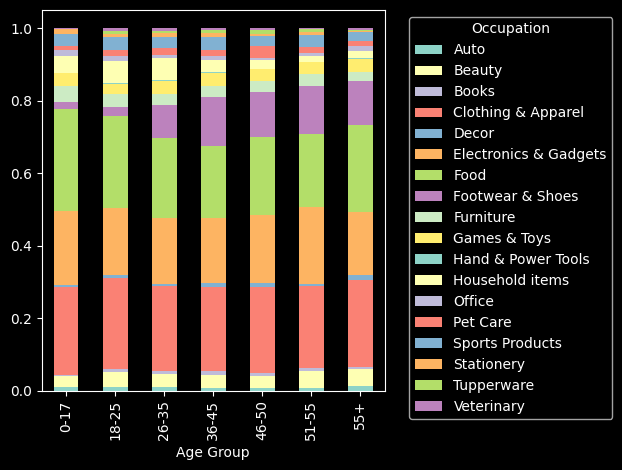

In [476]:
pd.crosstab(df['Age Group'],df['Product_Category'],normalize='index').plot(kind='bar',stacked=True)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

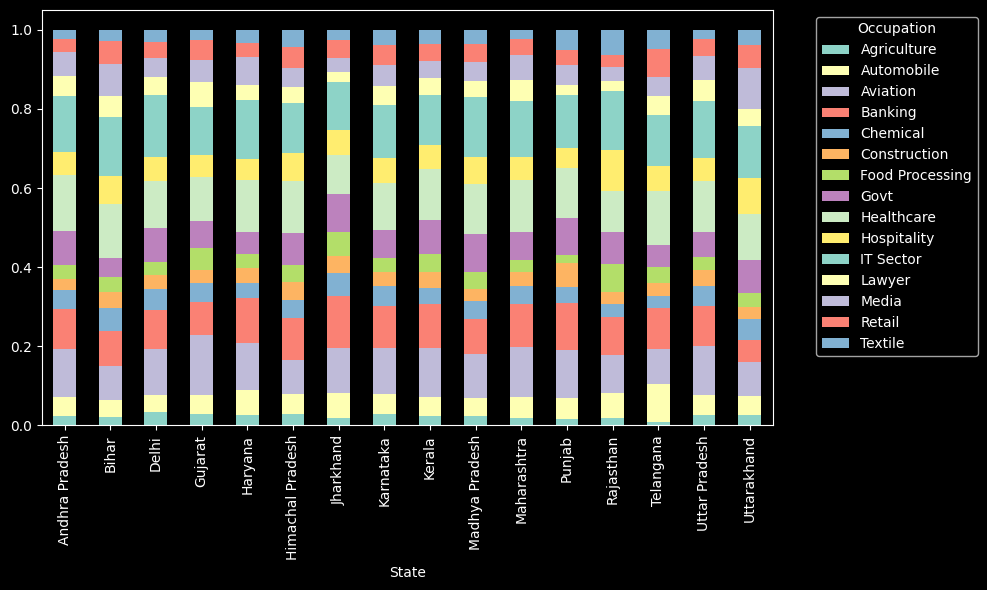

In [477]:
df.groupby(['State'])['Occupation'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True,figsize=(10,6))
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [478]:
df.groupby(['Zone','State'])['Gender'].value_counts()

Zone      State             Gender
Central   Delhi             F          751
                            M          356
          Madhya Pradesh    F          619
                            M          304
          Uttar Pradesh     F         1373
                            M          571
          Uttarakhand       F          218
                            M          102
Eastern   Bihar             F          302
                            M          131
          Jharkhand         F          264
                            M          116
Northern  Haryana           F          324
                            M          127
          Himachal Pradesh  F          423
                            M          185
          Punjab            F          134
                            M           66
          Rajasthan         F          149
                            M           82
Southern  Andhra Pradesh    F          555
                            M          257
          Karnataka

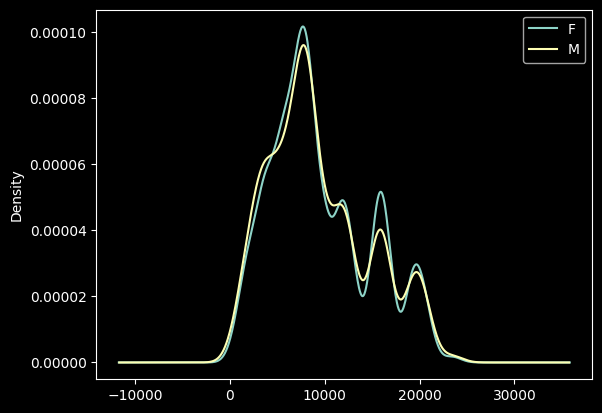

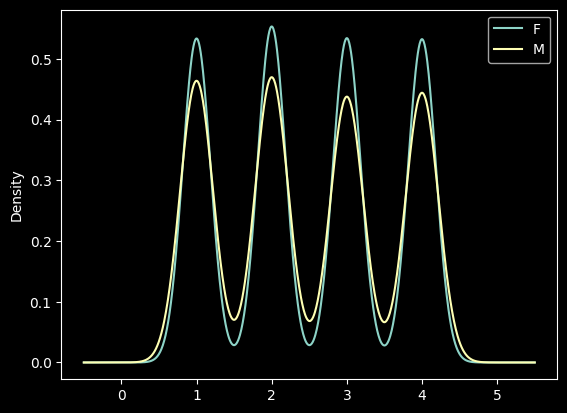

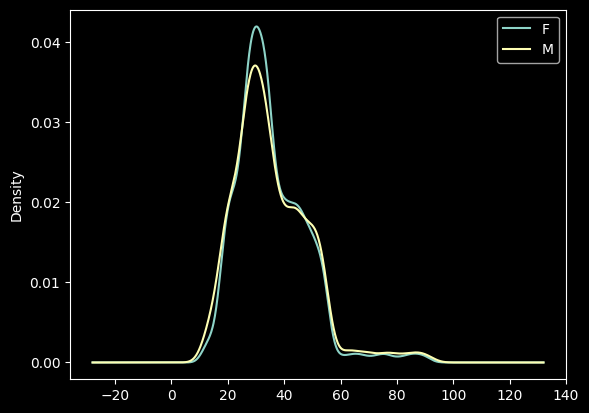

In [479]:
df.groupby('Gender')['Amount'].plot(kind='kde')
plt.legend()
plt.show()
df.groupby('Gender')['Orders'].plot(kind='kde')
plt.legend()
plt.show()
df.groupby('Gender')['Age'].plot(kind='kde')
plt.legend()
plt.show()

In [480]:
df1 = df[df['Marital_Status']==1]
pd.crosstab(df1['Product_Category'],df1['Gender'])

Gender,F,M
Product_Category,,
Auto,29,15
Beauty,137,43
Books,17,37
Clothing & Apparel,780,340
Decor,36,11
Electronics & Gadgets,640,270
Food,695,297
Footwear & Shoes,328,121
Furniture,90,57


In [481]:
df1 = df[df['Marital_Status']==0]
pd.crosstab(df1['Product_Category'],df1['Gender'])

Gender,F,M
Product_Category,,
Auto,37,18
Beauty,188,54
Books,22,27
Clothing & Apparel,1074,459
Decor,43,6
Electronics & Gadgets,832,340
Food,1079,422
Footwear & Shoes,458,157
Furniture,130,76


In [482]:
pd.crosstab(df['Gender'],df['Product_Category'])

Product_Category,Auto,Beauty,Books,Clothing & Apparel,Decor,Electronics & Gadgets,Food,Footwear & Shoes,Furniture,Games & Toys,Hand & Power Tools,Household items,Office,Pet Care,Sports Products,Stationery,Tupperware,Veterinary
Gender,,,,,,,,,,,,,,,,,,
F,66,325,39,1854,79,1472,1774,786,220,273,9,284,75,144,264,59,52,63
M,33,97,64,799,17,610,719,278,133,113,17,236,38,68,92,53,20,18


In [483]:
pd.crosstab(df['Occupation'],df['Orders'],normalize='index')*100

Orders,1,2,3,4
Occupation,,,,
Agriculture,23.049645,26.950355,22.340426,27.659574
Automobile,27.915194,25.795053,22.084806,24.204947
Aviation,25.744843,26.126814,25.133690,22.994652
Banking,25.109745,25.899912,25.373134,23.617208
Chemical,25.092251,31.549815,19.926199,23.431734
Construction,27.360775,23.970944,22.518160,26.150121
Food Processing,21.513002,28.132388,25.531915,24.822695
Govt,25.175644,22.833724,26.463700,25.526932
Healthcare,26.136364,26.065341,24.076705,23.721591


In [484]:
pd.crosstab(df['Gender'],df['Occupation'])

Occupation,Agriculture,Automobile,Aviation,Banking,Chemical,Construction,Food Processing,Govt,Healthcare,Hospitality,IT Sector,Lawyer,Media,Retail,Textile
Gender,,,,,,,,,,,,,,,
F,202,392,931,825,379,299,295,605,968,468,1075,364,428,370,237
M,80,174,378,314,163,114,128,249,440,234,511,167,209,131,113


In [485]:
pd.crosstab(df['Age Group'],df['Marital_Status'],normalize='index')

Marital_Status,0,1
Age Group,,
0-17,0.621622,0.378378
18-25,0.573482,0.426518
26-35,0.574703,0.425297
36-45,0.576805,0.423195
46-50,0.584600,0.415400
51-55,0.595668,0.404332
55+,0.605140,0.394860


In [486]:
pd.crosstab(df['Age Group'],df['Gender'],normalize='index')*100

Gender,F,M
Age Group,,
0-17,54.729730,45.270270
18-25,69.488818,30.511182
26-35,72.014103,27.985897
36-45,69.146608,30.853392
46-50,70.516717,29.483283
51-55,66.666667,33.333333
55+,63.785047,36.214953


In [487]:
df.head()

,Cust_name,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,Sanskriti,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,Kartik,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,Bindu,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,Sudevi,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,Joni,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


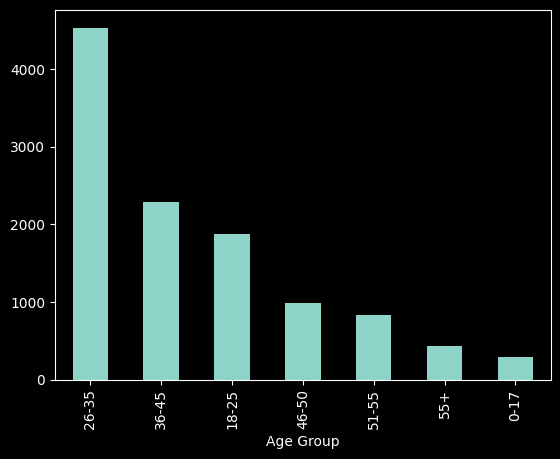

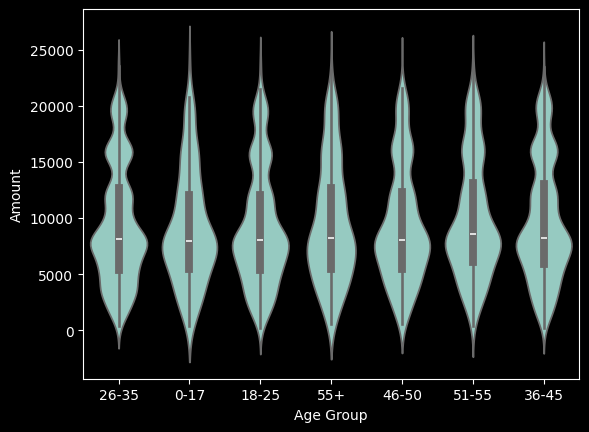

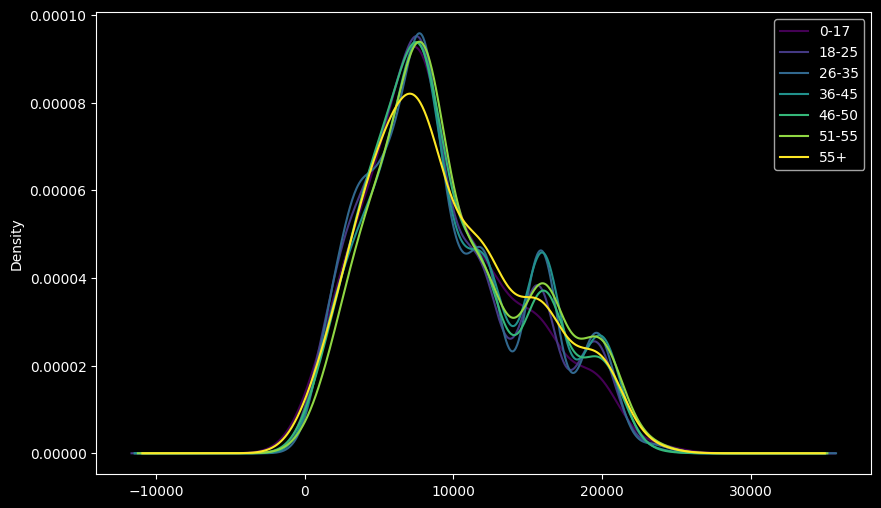

In [488]:
df['Age Group'].value_counts().plot(kind='bar')
plt.show()
sns.violinplot(x='Age Group', y='Amount',data=df)
plt.show()
grouped = df.groupby('Age Group')['Amount']
colormap = plt.colormaps.get_cmap('viridis')
colormap = colormap(np.linspace(0, 1, len(grouped)))
fig, ax = plt.subplots(figsize=(10, 6))
for i, (key, group) in enumerate(grouped):
    group.plot( kind='kde', ax=ax, color=[colormap[i]], label=key)
plt.legend()
plt.show()

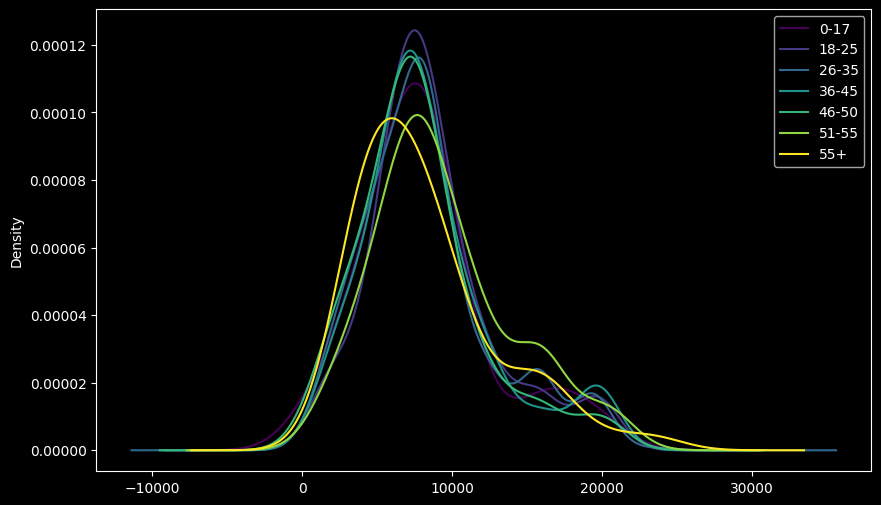

In [489]:
dfN = df[df['Zone']=='Northern']
# dfN['Occupation'].value_counts().plot(kind='bar')
grouped = dfN.groupby('Age Group')['Amount']
colormap = plt.colormaps.get_cmap('viridis')
colormap = colormap(np.linspace(0, 1, len(grouped)))
fig, ax = plt.subplots(figsize=(10, 6))
for i, (key, group) in enumerate(grouped):
    group.plot( kind='kde', ax=ax, color=[colormap[i]], label=key)
plt.legend()
plt.show()

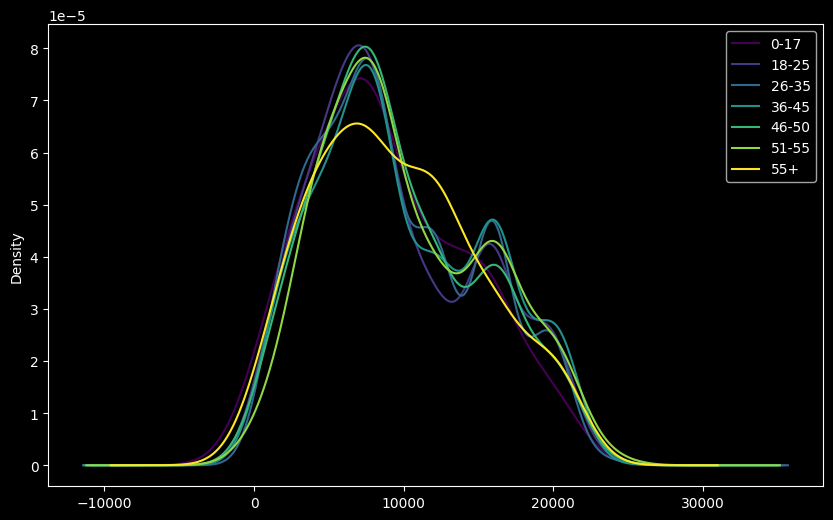

In [490]:
dfC = df[df['Zone']=='Central']
#dfC['Occupation'].value_counts().plot(kind='bar')
grouped = dfC.groupby('Age Group')['Amount']
colormap = plt.colormaps.get_cmap('viridis')
colormap = colormap(np.linspace(0, 1, len(grouped)))

fig, ax = plt.subplots(figsize=(10, 6))
for i, (key, group) in enumerate(grouped):
    group.plot( kind='kde', ax=ax, color=[colormap[i]], label=key)
plt.legend()
plt.show()

# Conclusions
-product category has impact over amount</br>
-Mostly female purchases in each state</br>
-Old people 55+ tend to spend less</br>
-26+ age bought footwear more</br>
-married people tend to spend less, or can say unmarried had more no. of purchases in each category</br>
-Books, hand and power tools are mostly bought by man, and married people
-married people bought more veteniary items</br>
-stationery is mostly equally bought</br>
-females spend more than males</br>
-26-45 tend to spend more </br>
-most likely population is divided into ppl spend 0-10k, 10k+</br>
-northern and eastern tend to spend more in 0-10k, and less above 10k+, while rest zones are opposite</br>



# Model prediction

In [491]:
df.drop(columns=['Cust_name'],inplace=True)
df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [492]:
Q1 = df.groupby('Zone')['Amount'].quantile(0.25)
Q3 = df.groupby('Zone')['Amount'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df.join(lower_bound, on='Zone', rsuffix='_lower')
df = df.join(upper_bound, on='Zone', rsuffix='_upper')
df = df[(df['Amount'] >= df['Amount_lower']) & (df['Amount'] <= df['Amount_upper'])]
df = df.drop(columns=['Amount_lower', 'Amount_upper'])

In [493]:
Q1 = df.groupby('Marital_Status')['Amount'].quantile(0.25)
Q3 = df.groupby('Marital_Status')['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df.join(lower_bound, on='Marital_Status', rsuffix='_lower')
df = df.join(upper_bound, on='Marital_Status', rsuffix='_upper')
df = df[(df['Amount'] >= df['Amount_lower']) & (df['Amount'] <= df['Amount_upper'])]
df = df.drop(columns=['Amount_lower', 'Amount_upper'])

In [494]:
Q1 = df.groupby('State')['Amount'].quantile(0.25)
Q3 = df.groupby('State')['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df.join(lower_bound, on='State', rsuffix='_lower')
df = df.join(upper_bound, on='State', rsuffix='_upper')
df = df[(df['Amount'] >= df['Amount_lower']) & (df['Amount'] <= df['Amount_upper'])]
df = df.drop(columns=['Amount_lower', 'Amount_upper'])

In [495]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
encoder = LabelEncoder()
tencoder = ce.TargetEncoder()
df['Age Group'] = tencoder.fit_transform(X=df['Age Group'],y=df['Amount'])
df['Age'] = np.log(df['Age'])
#df = pd.get_dummies(df,columns=['Zone'])
freq_encoding = df['Gender'].value_counts(normalize=True)  # Get the frequency
df['Gender'] = df['Gender'].map(freq_encoding)
freq_encoding = df['Zone'].value_counts(normalize=True)  # Get the frequency
zonemap = {'Central':1,'Southern':2,'Western':3,'Eastern':4,'Northern':5}
#df['Zone'] = df['Zone'].map(zonemap) 
freq_encoding = df['State'].value_counts(normalize=True)  # Get the frequency
#df['State'] = df['State'].map(freq_encoding) 
df['Zone'] = tencoder.fit_transform(X=df['Zone'],y=df['Amount'])
freq_encoding = df['Occupation'].value_counts(normalize=True)  # Get the frequency
#df['Occupation'] = df['Occupation'].map(freq_encoding) 
df['Occupation'] = tencoder.fit_transform(df['Occupation'],y=df['Amount'])
df['Product_Category'] = tencoder.fit_transform(df['Product_Category'],y=df['Amount'])
df['State'] = tencoder.fit_transform(X=df['State'],y=df['Amount'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Marital_Status']  = df['Marital_Status']
df['New'] = df['Gender'].astype(str)+df['Marital_Status'].astype(str) + df['Orders'].astype(str)
df['New'] = tencoder.fit_transform(X=df['New'],y=df['Amount'])

In [496]:
df.dropna(inplace=True)
df.head(10)

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,New
52,1,9208.588843,3.850148,0,10475.627112,9588.158709,8957.143695,14731.565027,1,21547.0,9267.957207
53,1,9080.322261,3.555348,0,10475.627112,9588.158709,9185.048077,14731.565027,1,21533.0,9267.957207
54,1,8862.453099,3.091042,1,10475.627112,9588.158709,9557.189627,14731.565027,1,21503.0,9478.359848
55,0,9080.322261,3.526361,1,10350.318740,9555.218786,9075.922927,14731.565027,2,21495.0,8823.799465
56,1,9080.322261,3.496508,1,10475.627112,9588.158709,9021.093525,14731.565027,3,21463.0,9036.631313
57,1,9467.336257,3.583519,0,10475.627112,9588.158709,9075.922927,14731.565027,4,21427.0,9422.173617
58,1,9613.154613,3.951244,0,10475.627112,9588.158709,9075.922927,14731.565027,4,21423.0,9422.173617
59,0,8862.453099,2.890372,1,10475.627112,9588.158709,8343.426065,14731.565027,2,21401.0,8823.799465
60,0,9467.336257,3.663562,0,9445.532237,9376.484037,9039.124546,14731.565027,3,21397.0,8979.377828
61,0,9080.322261,3.526361,1,10475.627112,9588.158709,9021.093525,14731.565027,4,21388.0,8831.284810


In [500]:
df.corr()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,New
Gender,1.000000,-0.003525,0.005684,-0.012109,-0.009878,-0.010764,0.003004,0.031147,0.006710,0.030823,0.612991
Age Group,-0.003525,1.000000,0.810394,-0.004915,0.005336,-0.002141,0.016427,0.058526,0.013501,0.047662,-0.005180
Age,0.005684,0.810394,1.000000,-0.008450,0.000235,0.001787,0.000976,0.054491,0.011989,0.041241,0.004481
Marital_Status,-0.012109,-0.004915,-0.008450,1.000000,0.011105,0.004175,0.038475,-0.026934,-0.005886,-0.023649,-0.470320
State,-0.009878,0.005336,0.000235,0.011105,1.000000,0.667846,0.016492,0.229391,-0.009470,0.220063,0.000286
Zone,-0.010764,-0.002141,0.001787,0.004175,0.667846,1.000000,0.026001,0.141196,-0.000916,0.146968,-0.001544
Occupation,0.003004,0.016427,0.000976,0.038475,0.016492,0.026001,1.000000,0.045695,-0.000582,0.054410,-0.014975
Product_Category,0.031147,0.058526,0.054491,-0.026934,0.229391,0.141196,0.045695,1.000000,-0.016778,0.792437,0.047373
Orders,0.006710,0.013501,0.011989,-0.005886,-0.009470,-0.000916,-0.000582,-0.016778,1.000000,-0.014818,-0.294698
Amount,0.030823,0.047662,0.041241,-0.023649,0.220063,0.146968,0.054410,0.792437,-0.014818,1.000000,0.050283


In [497]:
x= df.drop(columns=['Amount'])
dfx = df.drop(columns=['Amount'])
x = df[['Product_Category','State','New']]
dfx = x
y = df['Amount']

In [498]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
y = np.array(y)
x = np.array(x)
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)
y_train_s = scaler.fit_transform(y_train.reshape(-1,1)).ravel()
y_test_s = scaler.fit_transform(y_test.reshape(-1,1)).ravel()
lr = LinearRegression()
lr.fit(x_train_s,y_train_s)
y_pred = lr.predict(x_test_s)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).ravel()
y_test = scaler.inverse_transform(y_test_s.reshape(-1,1)).ravel()
print("R2 score: ",r2_score(y_pred=y_pred,y_true=y_test))
print("100-MAPE: ",100-mean_absolute_percentage_error(y_pred,y_test))
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

R2 score:  0.6587787453733662
100-MAPE:  99.75488648540697
Mean Absolute Error (MAE): 2225.4832025368864
Root Mean Squared Error (RMSE): 2932.3044286258473


In [499]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfg = RandomForestRegressor(random_state=2)
param={
    "n_estimators":[100,150],
    "max_depth" : [2,3,5,7],
    "max_features" :['sqrt','log2'],
    "n_jobs": [-1],
}
gridRfg = GridSearchCV(estimator=rfg,cv=5,param_grid=param,n_jobs=-1)
gridRfg.fit(x_train,y_train)
y_pred = gridRfg.best_estimator_.predict(x_test)
print("Best Parameters:", gridRfg.best_params_)
print("R2 score: ",r2_score(y_pred,y_test))
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
featureImps = gridRfg.best_estimator_.feature_importances_
featImps = [f"{value:.10f}" for value in featureImps]
print("feature Importance: ",)
cols = np.array(dfx.columns)
for (a,b) in zip(cols,featImps):
    print((a,b))

Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100, 'n_jobs': -1}
R2 score:  0.3462256893188679
Mean Absolute Error (MAE): 2307.1235712960433
Root Mean Squared Error (RMSE): 2993.4444525394983
feature Importance: 
('Product_Category', '0.9294355656')
('State', '0.0568993122')
('New', '0.0136651222')
